In [1]:
from scripts.preprocessing import PreProcessor
from scripts.visualizer import Visualizer
import pandas as pd
from ast import literal_eval

DATA_FILE = 'data/congress-tweets.csv'
PREPROCESSED_FILE = 'data/processed-tweets.csv'

### Pre-process Tweets (Once)

In [ ]:
# Don't run if you already have data/processed-tweets.csv
tweets = pd.read_csv(DATA_FILE, encoding='utf-8')
pp = PreProcessor()
processed_tweets = pp.pre_process_df(tweets)
# Saving locally so we only have to pre-process once
processed_tweets.to_csv(PREPROCESSED_FILE, encoding='utf-8', index=False)

### Load Processed Tweets

In [2]:
processed_tweets = pd.read_csv(PREPROCESSED_FILE, 
                               encoding='utf-8', 
                               converters={'tokens_no_stop': literal_eval})
# Working with subset of data for speed
processed_tweets = processed_tweets.sample(n=10000)

### Visualize data

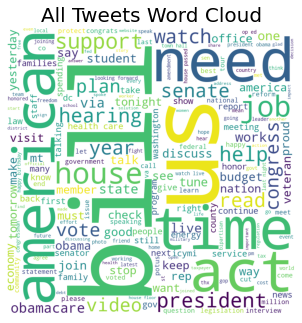

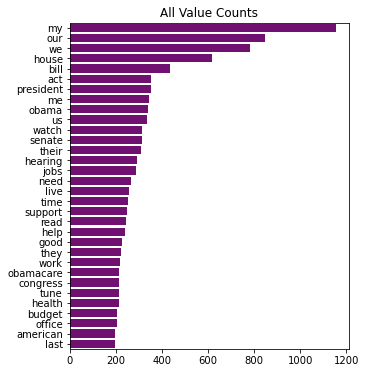

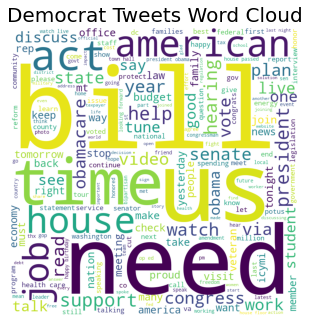

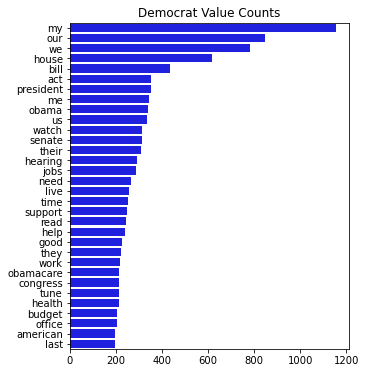

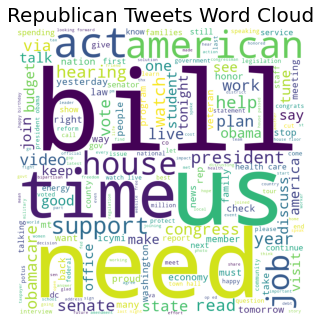

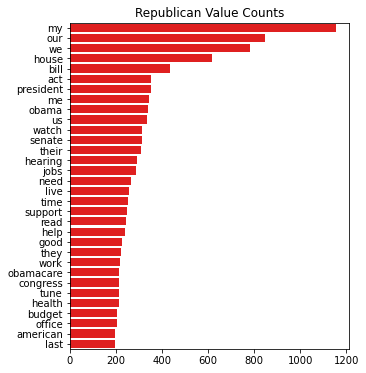

In [3]:
v = Visualizer()
v.visualize_words(processed_tweets)

### Analyzing Sentiment

In [4]:
neg_words = pd.read_csv('data/negativewords.csv').squeeze('columns')
v.visualize_word_freq(neg_words, processed_tweets, word_type='Negative')

Filtering tweets that don't contain given words:


 13%|████████▎                                                         | 583/4660 [00:04<00:31, 130.28it/s]


KeyboardInterrupt: 

In [ ]:
pos_words = pd.read_csv("data/positivewords.csv").squeeze('columns')
v.visualize_word_freq(pos_words, processed_tweets, word_type='Positive')

### Analyzing Bad Words

Filtering tweets that don't contain given words:


100%|███████████████████████████████████████████████████████████████████| 917/917 [00:06<00:00, 145.66it/s]


party
D    0.007987
R    0.006965
Name: tweet, dtype: float64
Generating word frequencies:


100%|██████████████████████████████████████████████████████████████████| 917/917 [00:00<00:00, 2032.30it/s]


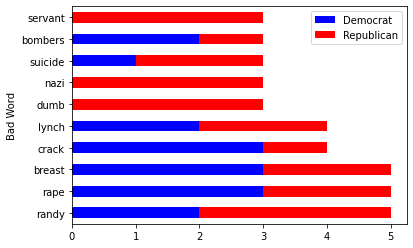

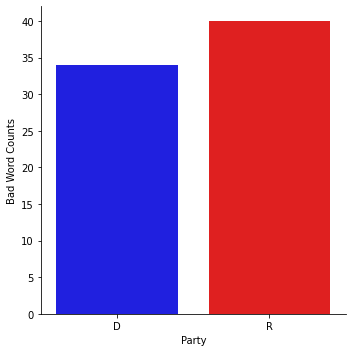

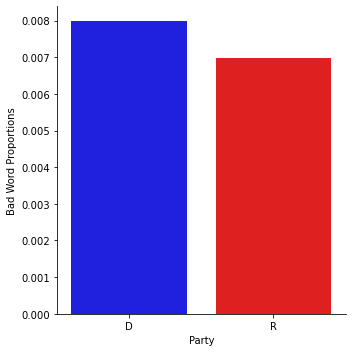

In [5]:
bad_words = pd.read_csv('data/bad-words.csv').squeeze('columns')
v.visualize_word_freq(bad_words, processed_tweets, word_type='Bad')

### Analyzing Inclusive and Exclusive Language

In [ ]:
inclusive_words = pd.Series(['we', 'our', 'us', 'ourselves'])
v.visualize_word_freq(inclusive_words, processed_tweets, word_type='Inclusive')

In [ ]:
exclusive_words = pd.Series(['my', 'i', 'mine', 'me', 'them', 'their', 'they', 'those'])
v.visualize_word_freq(exclusive_words, processed_tweets, word_type='Exclusive')

### Analyzing Religious Language

In [ ]:
religious_words = pd.read_csv('data/religious_words.csv').squeeze('columns')
v.visualize_word_freq(religious_words, processed_tweets, word_type="Religious")